In [40]:
import pandas as pd

# Specify the path to the CSV file
file_path = r'C:\Users\onurr\ofi-cross-impact-analysis\data\xnas-itch-20241219.mbp-10.csv'

# Load the data
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(data.head())

# Display information about the dataset (columns, types, null values)
print("\nDataset Information:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

First Few Rows of the Dataset:
                          ts_recv                        ts_event  rtype  \
0  2024-12-19T09:00:00.012077078Z  2024-12-19T09:00:00.011910681Z     10   
1  2024-12-19T09:00:00.012400864Z  2024-12-19T09:00:00.012234472Z     10   
2  2024-12-19T09:00:00.014323911Z  2024-12-19T09:00:00.014157632Z     10   
3  2024-12-19T09:00:00.014357708Z  2024-12-19T09:00:00.014191599Z     10   
4  2024-12-19T09:00:00.017649814Z  2024-12-19T09:00:00.017483329Z     10   

   publisher_id  instrument_id action side  depth  price  size  ...  \
0             2          16244      A    N      0  443.0   300  ...   
1             2          16244      A    B      0  444.0   300  ...   
2             2          16244      A    B      0  446.0   200  ...   
3             2          16244      A    B      0  448.0   200  ...   
4             2          16244      A    B      4  410.0   700  ...   

   ask_sz_08  bid_ct_08  ask_ct_08  bid_px_09  ask_px_09  bid_sz_09  \
0          0  

In [41]:
# Inspect specific columns: timestamps, bid sizes, and ask sizes
columns_to_inspect = ['ts_event', 'bid_sz_00', 'ask_sz_00', 'bid_sz_01', 'ask_sz_01', 
                      'bid_sz_02', 'ask_sz_02', 'bid_sz_03', 'ask_sz_03', 'bid_sz_04', 'ask_sz_04']

print("Inspecting columns for OFI calculation:")
print(data[columns_to_inspect].head())


Inspecting columns for OFI calculation:
                         ts_event  bid_sz_00  ask_sz_00  bid_sz_01  ask_sz_01  \
0  2024-12-19T09:00:00.011910681Z        300          0          0          0   
1  2024-12-19T09:00:00.012234472Z        300          0        300          0   
2  2024-12-19T09:00:00.014157632Z        200          0        300          0   
3  2024-12-19T09:00:00.014191599Z        200          0        200          0   
4  2024-12-19T09:00:00.017483329Z        200          0        200          0   

   bid_sz_02  ask_sz_02  bid_sz_03  ask_sz_03  bid_sz_04  ask_sz_04  
0          0          0          0          0          0          0  
1          0          0          0          0          0          0  
2        300          0          0          0          0          0  
3        300          0        300          0          0          0  
4        300          0        300          0        700          0  


In [42]:
# Convert ts_event to datetime and sort the data
data['ts_event'] = pd.to_datetime(data['ts_event'])  # Convert to datetime
data = data.sort_values('ts_event').reset_index(drop=True)  # Sort and reset index

# Display the first few rows to verify sorting
print("Data after sorting by ts_event:")
print(data[['ts_event', 'bid_sz_00', 'ask_sz_00', 'bid_sz_01', 'ask_sz_01']].head())


Data after sorting by ts_event:
                             ts_event  bid_sz_00  ask_sz_00  bid_sz_01  \
0 2024-12-19 09:00:00.011910681+00:00        300          0          0   
1 2024-12-19 09:00:00.012234472+00:00        300          0        300   
2 2024-12-19 09:00:00.014157632+00:00        200          0        300   
3 2024-12-19 09:00:00.014191599+00:00        200          0        200   
4 2024-12-19 09:00:00.017483329+00:00        200          0        200   

   ask_sz_01  
0          0  
1          0  
2          0  
3          0  
4          0  


In [43]:
# Calculate changes (deltas) for bid and ask sizes
bid_columns = ['bid_sz_00', 'bid_sz_01', 'bid_sz_02', 'bid_sz_03', 'bid_sz_04']
ask_columns = ['ask_sz_00', 'ask_sz_01', 'ask_sz_02', 'ask_sz_03', 'ask_sz_04']

# Compute differences using the .diff() method
data[[f'delta_{col}' for col in bid_columns]] = data[bid_columns].diff().fillna(0)
data[[f'delta_{col}' for col in ask_columns]] = data[ask_columns].diff().fillna(0)

# Display the first few rows to verify the calculations
columns_to_display = ['ts_event'] + [f'delta_{col}' for col in bid_columns + ask_columns]
print("First few rows after calculating deltas:")
print(data[columns_to_display].head())


First few rows after calculating deltas:
                             ts_event  delta_bid_sz_00  delta_bid_sz_01  \
0 2024-12-19 09:00:00.011910681+00:00              0.0              0.0   
1 2024-12-19 09:00:00.012234472+00:00              0.0            300.0   
2 2024-12-19 09:00:00.014157632+00:00           -100.0              0.0   
3 2024-12-19 09:00:00.014191599+00:00              0.0           -100.0   
4 2024-12-19 09:00:00.017483329+00:00              0.0              0.0   

   delta_bid_sz_02  delta_bid_sz_03  delta_bid_sz_04  delta_ask_sz_00  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2            300.0              0.0              0.0              0.0   
3              0.0            300.0              0.0              0.0   
4              0.0              0.0            700.0              0.0   

   delta_ask_sz_01  delta_ask_sz_02  delta_ask_sz_03  delta_ask_sz_04

In [44]:
# Calculate OFI for each level
ofi_columns = []
for i in range(5):  # Levels 0 to 4
    bid_col = f'delta_bid_sz_0{i}'
    ask_col = f'delta_ask_sz_0{i}'
    ofi_col = f'OFI_Level_{i}'
    data[ofi_col] = data[bid_col] - data[ask_col]
    ofi_columns.append(ofi_col)

# Display the first few rows of OFI calculations
print("First few rows with OFI calculations:")
print(data[['ts_event'] + ofi_columns].head())


First few rows with OFI calculations:
                             ts_event  OFI_Level_0  OFI_Level_1  OFI_Level_2  \
0 2024-12-19 09:00:00.011910681+00:00          0.0          0.0          0.0   
1 2024-12-19 09:00:00.012234472+00:00          0.0        300.0          0.0   
2 2024-12-19 09:00:00.014157632+00:00       -100.0          0.0        300.0   
3 2024-12-19 09:00:00.014191599+00:00          0.0       -100.0          0.0   
4 2024-12-19 09:00:00.017483329+00:00          0.0          0.0          0.0   

   OFI_Level_3  OFI_Level_4  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3        300.0          0.0  
4          0.0        700.0  


In [45]:
# Display summary statistics for OFI levels
print("Summary statistics for OFI levels:")
print(data[ofi_columns].describe())


Summary statistics for OFI levels:
        OFI_Level_0   OFI_Level_1   OFI_Level_2   OFI_Level_3   OFI_Level_4
count  2.815095e+06  2.815095e+06  2.815095e+06  2.815095e+06  2.815095e+06
mean  -8.880695e-05 -1.420911e-06 -2.880897e-04 -1.705093e-04 -1.776139e-05
std    3.403481e+02  4.281779e+02  4.944771e+02  4.940796e+02  5.164525e+02
min   -5.153200e+04 -5.161300e+04 -5.160500e+04 -5.152200e+04 -5.152300e+04
25%   -3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
max    5.155200e+04  5.152100e+04  5.152100e+04  5.152700e+04  5.167300e+04


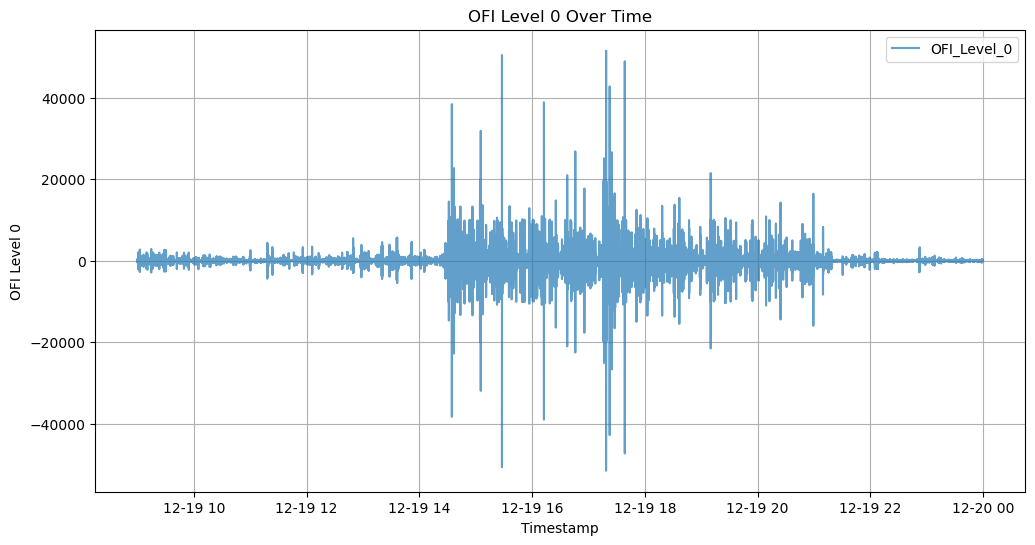

In [46]:
import matplotlib.pyplot as plt

# Plot the first OFI level (OFI_Level_0) over time
plt.figure(figsize=(12, 6))
plt.plot(data['ts_event'], data['OFI_Level_0'], label='OFI_Level_0', alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('OFI Level 0')
plt.title('OFI Level 0 Over Time')
plt.legend()
plt.grid(True)
plt.show()


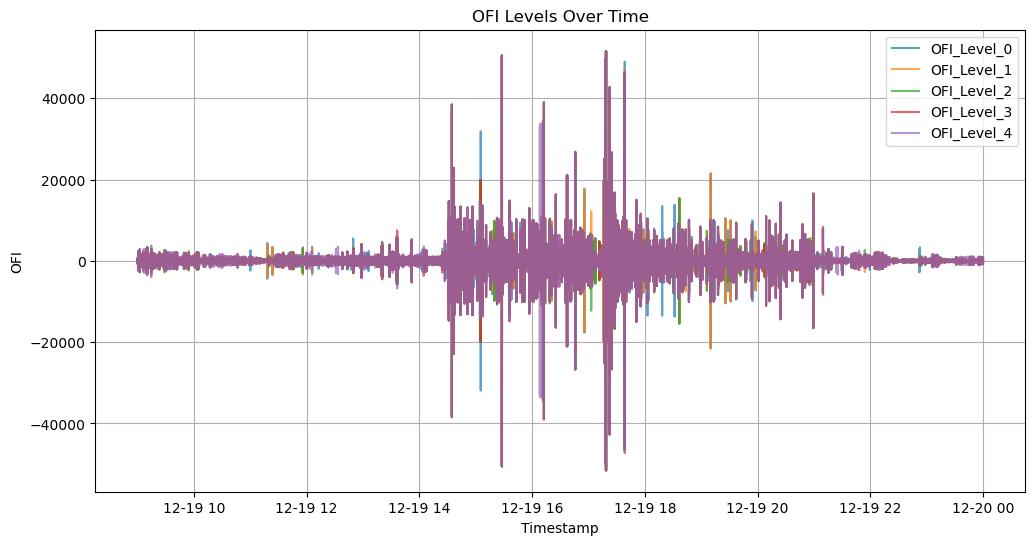

In [47]:
# Plot all OFI levels over time
plt.figure(figsize=(12, 6))
for level in range(5):  # Levels 0 to 4
    plt.plot(data['ts_event'], data[f'OFI_Level_{level}'], label=f'OFI_Level_{level}', alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('OFI')
plt.title('OFI Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
from sklearn.decomposition import PCA

# Select the OFI columns for PCA
ofi_data = data[ofi_columns]

# Apply PCA to reduce the multi-level OFI to a single metric
pca = PCA(n_components=1)
data['OFI_combined'] = pca.fit_transform(ofi_data)

# Display the first few rows of the combined OFI metric
print("First few rows with combined OFI metric:")
print(data[['ts_event', 'OFI_combined']].head())

# Explained variance ratio (optional: how much variance is explained by this component)
print("\nExplained variance ratio of the PCA component:")
print(pca.explained_variance_ratio_)


First few rows with combined OFI metric:
                             ts_event  OFI_combined
0 2024-12-19 09:00:00.011910681+00:00     -0.000072
1 2024-12-19 09:00:00.012234472+00:00     78.818229
2 2024-12-19 09:00:00.014157632+00:00   -170.289360
3 2024-12-19 09:00:00.014191599+00:00    166.512632
4 2024-12-19 09:00:00.017483329+00:00   -288.979964

Explained variance ratio of the PCA component:
[0.41149473]


In [49]:
# Calculate price change (delta) over time
data['price_change'] = data['price'].diff().fillna(0)

# Display the first few rows
print("First few rows with price changes:")
print(data[['ts_event', 'price', 'price_change', 'OFI_combined']].head())


First few rows with price changes:
                             ts_event  price  price_change  OFI_combined
0 2024-12-19 09:00:00.011910681+00:00  443.0           0.0     -0.000072
1 2024-12-19 09:00:00.012234472+00:00  444.0           1.0     78.818229
2 2024-12-19 09:00:00.014157632+00:00  446.0           2.0   -170.289360
3 2024-12-19 09:00:00.014191599+00:00  448.0           2.0    166.512632
4 2024-12-19 09:00:00.017483329+00:00  410.0         -38.0   -288.979964


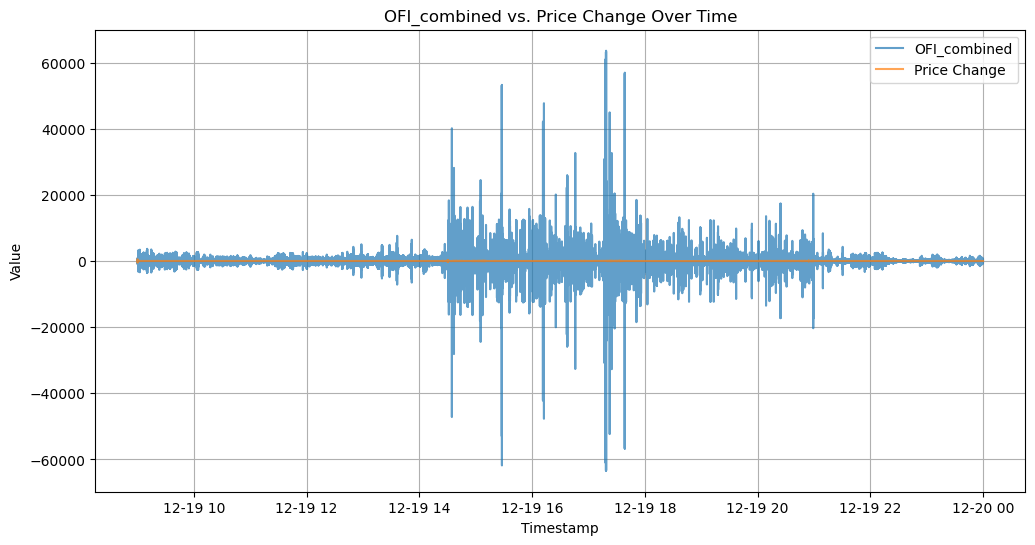

In [50]:
# Plot OFI_combined and price changes over time
plt.figure(figsize=(12, 6))
plt.plot(data['ts_event'], data['OFI_combined'], label='OFI_combined', alpha=0.7)
plt.plot(data['ts_event'], data['price_change'], label='Price Change', alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('OFI_combined vs. Price Change Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Calculate correlation between OFI_combined and price change
correlation = data['OFI_combined'].corr(data['price_change'])
print("Correlation between OFI_combined and price_change:", correlation)


Correlation between OFI_combined and price_change: -0.000520827819782681


In [52]:
# Create lagged OFI
data['OFI_combined_lagged'] = data['OFI_combined'].shift(1)

# Recalculate correlation with lagged OFI
lagged_correlation = data['OFI_combined_lagged'].corr(data['price_change'])
print("Correlation between lagged OFI_combined and price_change:", lagged_correlation)


Correlation between lagged OFI_combined and price_change: -0.00047270413030948554


In [53]:
import statsmodels.api as sm

# Regression analysis: price_change ~ OFI_combined
X = data[['OFI_combined']].fillna(0)  # Independent variable
y = data['price_change'].fillna(0)   # Dependent variable
X = sm.add_constant(X)               # Add constant for intercept

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           price_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7636
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.382
Time:                        15:30:13   Log-Likelihood:            -4.5437e+06
No. Observations:             2815095   AIC:                         9.087e+06
Df Residuals:                 2815093   BIC:                         9.087e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.178e-06      0.001     -0.003   

In [54]:
from statsmodels.tsa.stattools import grangercausalitytests

# Prepare data for Granger causality test
# Use 'OFI_combined' (lagged) as the independent variable and 'price_change' as the dependent variable
granger_data = data[['price_change', 'OFI_combined']].dropna()

# Perform Granger causality test for 1 to 5 lags
print("Granger Causality Test Results:")
grangercausalitytests(granger_data, maxlag=5, verbose=True)


Granger Causality Test Results:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0379  , p=0.1534  , df_denom=2815091, df_num=1
ssr based chi2 test:   chi2=2.0379  , p=0.1534  , df=1
likelihood ratio test: chi2=2.0379  , p=0.1534  , df=1
parameter F test:         F=2.0379  , p=0.1534  , df_denom=2815091, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2570  , p=0.2845  , df_denom=2815088, df_num=2
ssr based chi2 test:   chi2=2.5140  , p=0.2845  , df=2
likelihood ratio test: chi2=2.5140  , p=0.2845  , df=2
parameter F test:         F=1.2570  , p=0.2845  , df_denom=2815088, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0107  , p=0.3867  , df_denom=2815085, df_num=3
ssr based chi2 test:   chi2=3.0322  , p=0.3867  , df=3
likelihood ratio test: chi2=3.0322  , p=0.3867  , df=3
parameter F test:         F=1.0107  , p=0.3867  , df_denom=2815085, df_num=3

Granger Causality
number of lags (no 

{1: ({'ssr_ftest': (2.037928815340061, 0.15341852735851155, 2815091.0, 1),
   'ssr_chi2test': (2.0379309871300477, 0.15341819739450874, 1),
   'lrtest': (2.037930238060653, 0.1534182729570252, 1),
   'params_ftest': (2.037928804623746, 0.15341852846803575, 2815091.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.2569764441586688, 0.28451312774051213, 2815088.0, 2),
   'ssr_chi2test': (2.5139573534581934, 0.2845123329686603, 2),
   'lrtest': (2.513956243172288, 0.2845124909137208, 2),
   'params_ftest': (1.2569764449355532, 0.2845131275946678, 2815088.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0107154497599065, 0.38669551520754514, 2815085.0, 3),
   'ssr_chi2test': (3.0321538890252144, 0.38669419835796964, 3),
   'lrtest': (3.032152255065739, 0.3866944475896468, 3),
   'params_ftest': (1.01071544950847, 0.3866955154058802, 2815085.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


Correlation between volatility and OFI_combined: 0.00017985839462062608


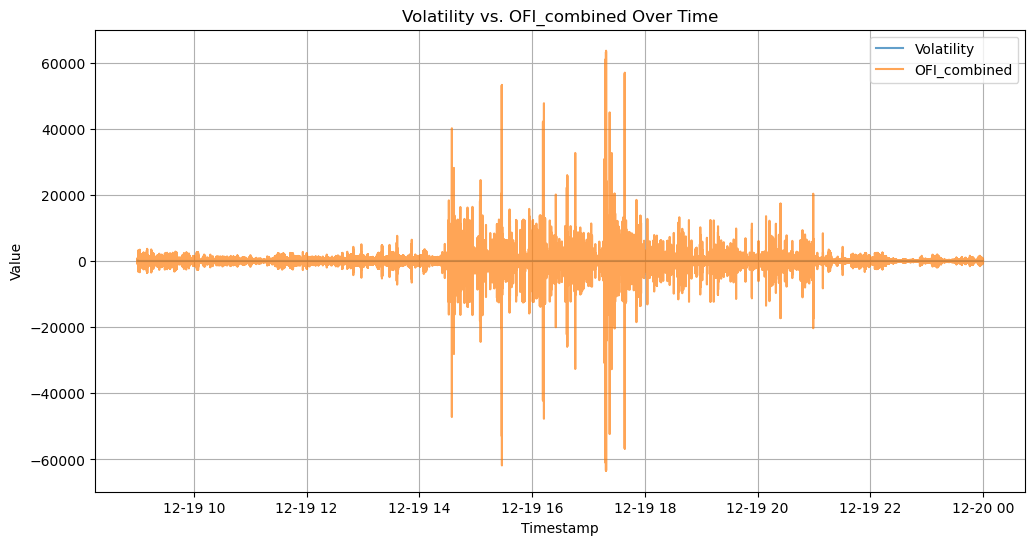

In [55]:
# Calculate rolling volatility (standard deviation of price changes)
data['volatility'] = data['price_change'].rolling(window=100).std()

# Drop rows with NaN values from rolling calculation
data.dropna(subset=['volatility'], inplace=True)

# Correlation between volatility and OFI_combined
volatility_correlation = data['volatility'].corr(data['OFI_combined'])
print("Correlation between volatility and OFI_combined:", volatility_correlation)

# Plot volatility and OFI_combined over time
plt.figure(figsize=(12, 6))
plt.plot(data['ts_event'], data['volatility'], label='Volatility', alpha=0.7)
plt.plot(data['ts_event'], data['OFI_combined'], label='OFI_combined', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Volatility vs. OFI_combined Over Time')
plt.legend()
plt.grid(True)
plt.show()


Correlation between momentum and OFI_combined: -0.0002269047687650305


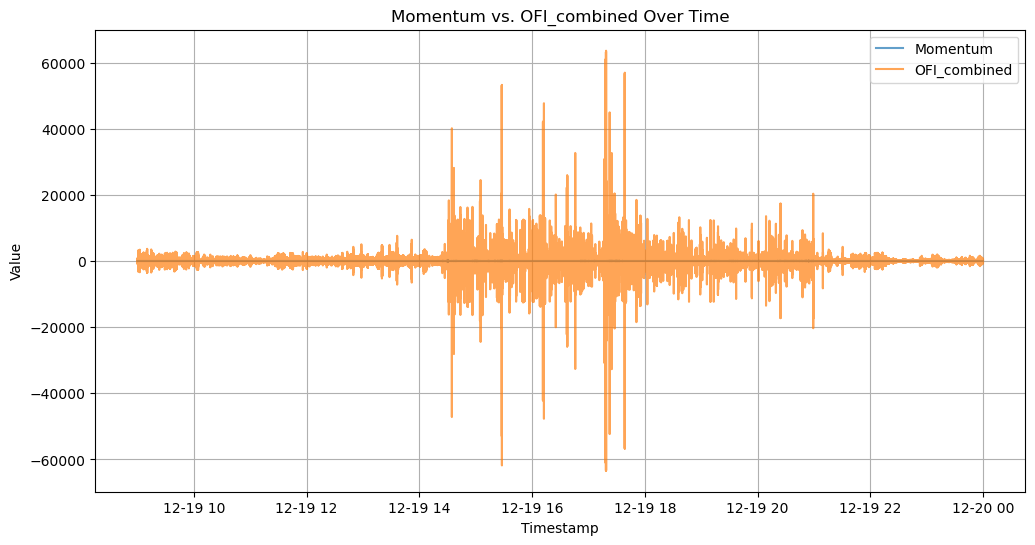

In [56]:
# Calculate momentum as rolling sum of price changes
data['momentum'] = data['price_change'].rolling(window=50).sum()

# Drop rows with NaN values from rolling calculation
data.dropna(subset=['momentum'], inplace=True)

# Correlation between momentum and OFI_combined
momentum_correlation = data['momentum'].corr(data['OFI_combined'])
print("Correlation between momentum and OFI_combined:", momentum_correlation)

# Plot momentum and OFI_combined over time
plt.figure(figsize=(12, 6))
plt.plot(data['ts_event'], data['momentum'], label='Momentum', alpha=0.7)
plt.plot(data['ts_event'], data['OFI_combined'], label='OFI_combined', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Momentum vs. OFI_combined Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
print("Current columns in the dataset:")
print(data.columns)
print("Current columns in the dataset:")
print(data.columns)


Current columns in the dataset:
Index(['ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id',
       'action', 'side', 'depth', 'price', 'size', 'flags', 'ts_in_delta',
       'sequence', 'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
       'bid_ct_00', 'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01',
       'ask_sz_01', 'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02',
       'bid_sz_02', 'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03',
       'ask_px_03', 'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03',
       'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04',
       'ask_ct_04', 'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05',
       'bid_ct_05', 'ask_ct_05', 'bid_px_06', 'ask_px_06', 'bid_sz_06',
       'ask_sz_06', 'bid_ct_06', 'ask_ct_06', 'bid_px_07', 'ask_px_07',
       'bid_sz_07', 'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_px_08',
       'ask_px_08', 'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08',
       'bid_px_09', 'ask_px_09

In [60]:
# Log-transform of the size column
data['log_volume'] = np.log1p(data['size'])  # Logarithmic transformation to handle skewness



In [61]:
# Moving average and price range
data['price_ma'] = data['price'].rolling(window=50).mean()  # Moving average with a window of 50
data['price_range'] = data['price'].rolling(window=50).max() - data['price'].rolling(window=50).min()  # Price range


In [62]:
# Drop rows with NaN values from rolling calculations
data.dropna(subset=['log_volume', 'price_ma', 'price_range'], inplace=True)

In [63]:
print("Current columns after adding new features:")
print(data.columns)


Current columns after adding new features:
Index(['ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id',
       'action', 'side', 'depth', 'price', 'size', 'flags', 'ts_in_delta',
       'sequence', 'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
       'bid_ct_00', 'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01',
       'ask_sz_01', 'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02',
       'bid_sz_02', 'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03',
       'ask_px_03', 'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03',
       'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04',
       'ask_ct_04', 'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05',
       'bid_ct_05', 'ask_ct_05', 'bid_px_06', 'ask_px_06', 'bid_sz_06',
       'ask_sz_06', 'bid_ct_06', 'ask_ct_06', 'bid_px_07', 'ask_px_07',
       'bid_sz_07', 'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_px_08',
       'ask_px_08', 'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08',
       'bid_px_09',

In [64]:
# Features and target variable
features = ['OFI_combined', 'log_volume', 'price_ma', 'price_range']
X = data[features]
y = data['price_change']

# Train-test split and Random Forest model as before


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
features = ['OFI_combined', 'log_volume', 'price_ma', 'price_range']
X = data[features]
y = data['price_change']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1.42919073680128
R-squared (R2): -0.16613856133786564


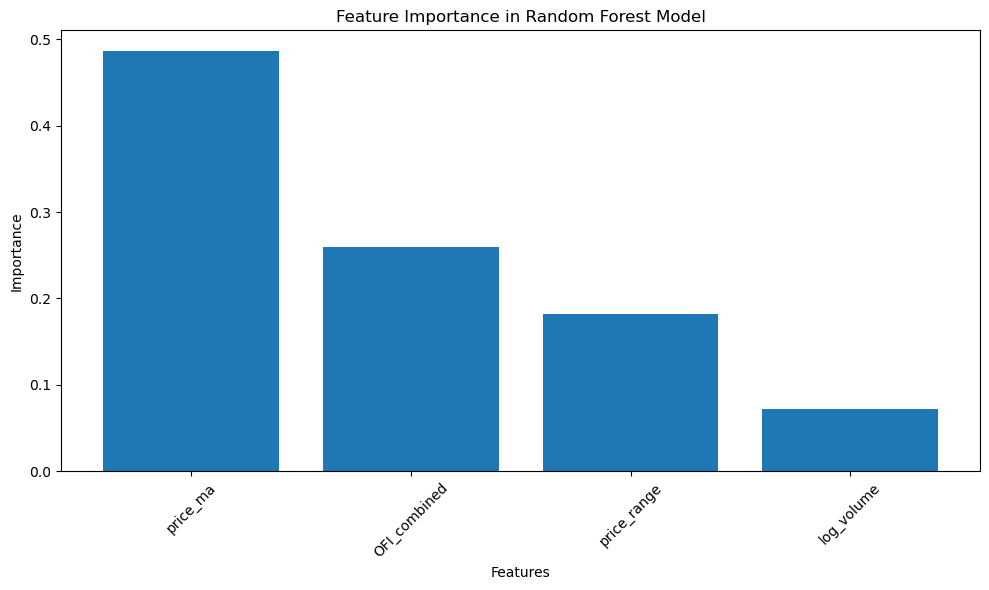

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()
